# Acoustic Exercises

Sources:

[1] Bohlen, Thomas, et al. "Visco-acoustic full waveform seismic inversion: from a DG forward solver to a Newton-CG inverse solver." (2020).

[2] Liu, Hsi-Ping, Don L. Anderson, and Hiroo Kanamori. "Velocity dispersion due to anelasticity; implications for seismology and mantle composition." Geophysical Journal International 47.1 (1976): 41-58.

### Exercise (1D Wave Equation)

### Visco Acoustic Wave Equation

Consider the visco-acoustic wave equation on the bounded domain $\Omega \subset \mathbb{R}^d$ with Lipschitz boundary $\partial \Omega = \Gamma_{\text{dyn}} \cup \Gamma_{\text{stat}}$ as well as on the time interval $[0, T]$ with the Generalized Standard
Linear Solid (GSLS) model for the rheological rock attenuation. In this model

Springs and Maxwell bodies? $\kappa_l$ with $l=1, \dots, L$

The first oder system of the wave equation in visco-acoustic media descirbes the evolution of the pressure $p \colon \Omega \times [0,T] \to \mathbb{R}$ and the particle velocity vector $\boldsymbol{v} \colon \Omega \times [0, T] \to \mathbb{R}^d$ by the balance of momentum

$$
\varrho \partial_{t} \boldsymbol{v}=\nabla p+\boldsymbol{f},
$$

where $\rho \colon \Omega \to \mathbb{R}$ ist the mass density of the media and $\boldsymbol{f} \colon \Omega \times [0, T] \to \mathbb{R}^{d + 1}$ ist the source term for the pressure and the velocity.

and the constitutive equation 

$$
\partial_{t} p(t)=\kappa \nabla \cdot \boldsymbol{v}(t)+\int_{0}^{t} \dot{\kappa}(t-s) \nabla \cdot \boldsymbol{v}(s) \mathrm{d} s
$$




$$
\begin{aligned}
\varrho \partial_{t} \boldsymbol{v}-\nabla p &=\boldsymbol{f} \\
\partial_{t} p_{0}-\kappa_{0} \nabla \cdot \boldsymbol{v} &=g_{0} \\
\partial_{t} p_{l}-\kappa_{l} \nabla \cdot \boldsymbol{v}+\tau_{l}^{-1} p_{l} &=g_{l}, \quad l=1, \ldots, L
\end{aligned}
$$

$\rho \in L^\infty(\Omega, \mathbb{R}_+)$, 
$$
    \begin{align*}
        \rho \partial_t v - \nabla(p_0 + \dots p_r) &= f, \\
        \partial p_0 - \kappa_0 \nabla \cdot v      &= 0, \\
        \partial_t - 
    \end{align*}
$$


### Discontinuous Galerkin Method

The visco-acoustic wave quation is approximated in the discontinuous Galerkin (dG) finite elment space

$$
V^{\text{dG}}_{h}=\left\{\boldsymbol{v}_{h} \in \mathrm{L}_{2}\left(\Omega ; \mathbb{R}^{d+1+L}\right):\left.\boldsymbol{v}_{h}\right|_{K} \in \mathbb{P}_{k}\left(\mathbb{R}^{d+1+L}\right) \text { for all } K \in \mathcal{K}\right\}
$$

with polyinomial degree $k \geq 0$. The domain $\Omega$ is decomposed into open and convex polyedral cells $K \subset \Omega$ with ...



In [1]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- Option:     SPACE_DIM= 3   (using cached value)
-- Option:     BUILD_SPACETIME_TESTS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- PROJECT_BINARY_DIR= /home/niklas/CLion/mpp/build
-- PROJECT_SOURCE_DIR= /home/niklas/CLion/mpp
-- PROJECT_MPP_DIR=    /home/niklas/CLion/mpp
-- Option:     BUILD_UQ= ON   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppDebug   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached value)
-- Option:     BUILD_TESTS= ON   (using cached value)
-- 

Consolidate compiler generated dependencies of target TestTimeSeries
Consolidate compiler generated dependencies of target TestTimeIntegrator
Consolidate compiler generated dependencies of target TestTimeIntegratorEOC
Consolidate compiler generated dependencies of target TestPolynomialProblems
[ 91%] Built target TestTimeSeries
[ 91%] Built target TestTimeIntegrator
[ 92%] Built target TestTimeIntegratorEOC
[ 92%] Built target TestPolynomialProblems
Consolidate compiler generated dependencies of target TestEigenSolverMPI
Consolidate compiler generated dependencies of target TestTransportEquality_ST_TSMPI
Consolidate compiler generated dependencies of target TestEllipticConsistency
Consolidate compiler generated dependencies of target TestPollutionProblemMPI
[ 94%] Built target TestEigenSolverMPI
[ 94%] Built target TestEllipticConsistency
[ 94%] Built target TestTransportEquality_ST_TSMPI
[ 94%] Built target TestPollutionProblemMPI
Consolidate compiler generated dependencies of target 

0

### Riemann Problem 

In [2]:
mpp.clean_data()
mpp.reset_data()

kwargs = {}
levels = [3, 4]
dts = [0.02, 0.01, 0.005]

for level in levels:
    for dt in dts:
        kwargs["dt"] = dt
        kwargs["level"] = level
        kwargs["PDESolverVerbose"] = 2
        mpp.run(8, config="TUT_acoustic_riemann", kwargs=kwargs)
        mpp.parse_json()



================ running  mpp ================

start program on 8 procs at Tue Jul  2 08:50:33 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     ConfigVerbose: ........................... 1
     dampingFlux: ............................. 0
     degree: .................................. 1
     Distribution: ............................ RCB
     dt: ...................................... 0.02
     f_source: ................................ 25
     flux_alpha: .............................. 1
     level: ................................... 3
     LinearEpsilon: ........................... 1e-12
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 200
     LinearVerbose: ........................... 0
     MeshVerbose: ............................. 1
     Model: ................................... DGAcoustic
     normal_x: ..........

     TI: n=35    t=0.7           Energy=1.353909      IErr_L1=0.12105036    IErr_L2=0.20926877    IErr_infty=0.78867513    Err_L1=1.2570183     Err_L2=0.77303566    Err_infty=0.960052      MaxP=0.75383025    MinP=-1.0326891    
     TI: n=36    t=0.72          Energy=1.3536308     IErr_L1=0.11254008    IErr_L2=0.20122492    IErr_infty=0.78867513    Err_L1=1.2859443     Err_L2=0.7846945     Err_infty=0.96902877    MaxP=0.65662095    MinP=-1.0275184    
     TI: n=37    t=0.74          Energy=1.3533531     IErr_L1=0.11254008    IErr_L2=0.20122492    IErr_infty=0.78867513    Err_L1=1.3478852     Err_L2=0.81587626    Err_infty=0.97656844    MaxP=0.68343452    MinP=-1.0355865    
     TI: n=38    t=0.76          Energy=1.3530782     IErr_L1=0.11374868    IErr_L2=0.21253773    IErr_infty=0.78867513    Err_L1=1.3773336     Err_L2=0.82889553    Err_infty=0.98234213    MaxP=0.69407809    MinP=-1.0428952    
     TI: n=39    t=0.78          Energy=1.3528099     IErr_L1=0.098821461   IErr_L2=0.18

     TI: n=36    t=0.36          Energy=1.3593959     IErr_L1=0.1863415     IErr_L2=0.26949253    IErr_infty=0.78867513    Err_L1=0.57316505    Err_L2=0.4729953     Err_infty=0.8838744     MaxP=1.0359922     MinP=-1.0342076    
     TI: n=37    t=0.37          Energy=1.3591912     IErr_L1=0.19275843    IErr_L2=0.28114614    IErr_infty=0.78867513    Err_L1=0.59022864    Err_L2=0.48020637    Err_infty=0.88594601    MaxP=1.0390032     MinP=-1.035823     
     TI: n=38    t=0.38          Energy=1.3589898     IErr_L1=0.17332067    IErr_L2=0.25458539    IErr_infty=0.78867513    Err_L1=0.60647578    Err_L2=0.48723488    Err_infty=0.88849624    MaxP=1.0399012     MinP=-1.03528      
     TI: n=39    t=0.39          Energy=1.3587915     IErr_L1=0.17332067    IErr_L2=0.25458539    IErr_infty=0.78867513    Err_L1=0.61834949    Err_L2=0.49010049    Err_infty=0.89140728    MaxP=1.0379649     MinP=-1.0319464    
     TI: n=40    t=0.4           Energy=1.358596      IErr_L1=0.1797376     IErr_L2=0.26

     TI: n=80    t=0.8           Energy=1.3524353     IErr_L1=0.10523839    IErr_L2=0.20462243    IErr_infty=0.78867513    Err_L1=1.4817684     Err_L2=0.87835784    Err_infty=1.2130352     MaxP=0.67227489    MinP=-1.0452738    
     TI: n=81    t=0.81          Energy=1.3523126     IErr_L1=0.10072784    IErr_L2=0.1932868     IErr_infty=0.78867513    Err_L1=1.5033773     Err_L2=0.88759373    Err_infty=0.98800178    MaxP=0.66282745    MinP=-1.0358186    
     TI: n=82    t=0.82          Energy=1.3521932     IErr_L1=0.10263423    IErr_L2=0.19815693    IErr_infty=0.78867513    Err_L1=1.5227261     Err_L2=0.89727082    Err_infty=0.98777495    MaxP=0.67136634    MinP=-1.0328331    
     TI: n=83    t=0.83          Energy=1.352077      IErr_L1=0.10714477    IErr_L2=0.20922887    IErr_infty=0.78867513    Err_L1=1.5411433     Err_L2=0.90701596    Err_infty=0.98715757    MaxP=0.6885724     MinP=-1.0389437    
     TI: n=84    t=0.84          Energy=1.3519634     IErr_L1=0.10714477    IErr_L2=0.20

     TI: n=22    t=0.11          Energy=1.3663813     IErr_L1=0.19485179    IErr_L2=0.27078406    IErr_infty=0.78867513    Err_L1=0.24786173    Err_L2=0.28211522    Err_infty=0.62334712    MaxP=1.014928      MinP=-1.0152677    
     TI: n=23    t=0.115         Energy=1.3662277     IErr_L1=0.18843485    IErr_L2=0.25866402    IErr_infty=0.78867513    Err_L1=0.25323755    Err_L2=0.28561091    Err_infty=0.60866842    MaxP=1.0144453     MinP=-1.0184753    
     TI: n=24    t=0.12          Energy=1.3660686     IErr_L1=0.19866455    IErr_L2=0.28391723    IErr_infty=0.78867513    Err_L1=0.25886919    Err_L2=0.2899068     Err_infty=0.60561055    MaxP=1.0134711     MinP=-1.0216441    
     TI: n=25    t=0.125         Energy=1.3659029     IErr_L1=0.18583069    IErr_L2=0.26033657    IErr_infty=0.78867513    Err_L1=0.26434393    Err_L2=0.29312388    Err_infty=0.60365257    MaxP=1.0144162     MinP=-1.0246887    
     TI: n=26    t=0.13          Energy=1.3657308     IErr_L1=0.194154      IErr_L2=0.27

     TI: n=75    t=0.375         Energy=1.3590588     IErr_L1=0.16690374    IErr_L2=0.24165428    IErr_infty=0.78867513    Err_L1=0.59762976    Err_L2=0.48199405    Err_infty=0.88746148    MaxP=1.0414714     MinP=-1.0373581    
     TI: n=76    t=0.38          Energy=1.3589586     IErr_L1=0.17332067    IErr_L2=0.25458539    IErr_infty=0.78867513    Err_L1=0.60763634    Err_L2=0.4874703     Err_infty=0.88881853    MaxP=1.0416541     MinP=-1.0368105    
     TI: n=77    t=0.385         Energy=1.3588591     IErr_L1=0.17141429    IErr_L2=0.25081336    IErr_infty=0.78867513    Err_L1=0.61526842    Err_L2=0.49060284    Err_infty=0.89026199    MaxP=1.0411108     MinP=-1.0355509    
     TI: n=78    t=0.39          Energy=1.3587603     IErr_L1=0.17332067    IErr_L2=0.25458539    IErr_infty=0.78867513    Err_L1=0.61956976    Err_L2=0.49036524    Err_infty=0.89177388    MaxP=1.0397483     MinP=-1.0334984    
     TI: n=79    t=0.395         Energy=1.3586623     IErr_L1=0.1797376     IErr_L2=0.26

     TI: n=131   t=0.655         Energy=1.3543923     IErr_L1=0.12556091    IErr_L2=0.21978164    IErr_infty=0.78867513    Err_L1=1.1396095     Err_L2=0.71802014    Err_infty=0.93970468    MaxP=0.98197747    MinP=-1.0489465    
     TI: n=132   t=0.66          Energy=1.3543217     IErr_L1=0.12365453    IErr_L2=0.21540099    IErr_infty=0.78867513    Err_L1=1.1514573     Err_L2=0.72308832    Err_infty=0.94214307    MaxP=0.96544449    MinP=-1.0506852    
     TI: n=133   t=0.665         Energy=1.3542513     IErr_L1=0.12556091    IErr_L2=0.21978164    IErr_infty=0.78867513    Err_L1=1.1678318     Err_L2=0.73077709    Err_infty=0.9446031     MaxP=0.94695109    MinP=-1.0519878    
     TI: n=134   t=0.67          Energy=1.3541811     IErr_L1=0.11914398    IErr_L2=0.20466323    IErr_infty=0.78867513    Err_L1=1.1912941     Err_L2=0.74312033    Err_infty=0.97742638    MaxP=0.92642291    MinP=-1.0527891    
     TI: n=135   t=0.675         Energy=1.354111      IErr_L1=0.12556091    IErr_L2=0.21

     TI: n=190   t=0.95          Energy=1.3507098     IErr_L1=0.075894775   IErr_L2=0.16252879    IErr_infty=0.62200847    Err_L1=1.8131478     Err_L2=1.069895      Err_infty=2.4749781     MaxP=0.69572637    MinP=-2.1901287    
     TI: n=191   t=0.955         Energy=1.3506524     IErr_L1=0.075894775   IErr_L2=0.16252879    IErr_infty=0.62200847    Err_L1=1.8219968     Err_L2=1.0755001     Err_infty=2.5072158     MaxP=0.69699989    MinP=-2.2193869    
     TI: n=192   t=0.96          Energy=1.3505949     IErr_L1=0.073290608   IErr_L2=0.16517767    IErr_infty=0.78867513    Err_L1=1.8311557     Err_L2=1.0812671     Err_infty=2.5357015     MaxP=0.69710652    MinP=-2.2458901    
     TI: n=193   t=0.965         Energy=1.3505375     IErr_L1=0.079707539   IErr_L2=0.18357722    IErr_infty=0.78867513    Err_L1=1.8407705     Err_L2=1.0873069     Err_infty=2.560453      MaxP=0.69608527    MinP=-2.2696382    
     TI: n=194   t=0.97          Energy=1.3504802     IErr_L1=0.077801157   IErr_L2=0.17

     TI: n=16    t=0.32          Energy=1.3859279     IErr_L1=0.096425959   IErr_L2=0.19394637    IErr_infty=0.78867513    Err_L1=0.4073456     Err_L2=0.40631471    Err_infty=0.94964649    MaxP=1.0145046     MinP=-1.016413     
     TI: n=17    t=0.34          Energy=1.3856613     IErr_L1=0.090311177   IErr_L2=0.17991239    IErr_infty=0.78867513    Err_L1=0.44286091    Err_L2=0.42768444    Err_infty=0.97593531    MaxP=1.0134683     MinP=-1.0205164    
     TI: n=18    t=0.36          Energy=1.385406      IErr_L1=0.087532564   IErr_L2=0.17576103    IErr_infty=0.78867513    Err_L1=0.47375074    Err_L2=0.44201792    Err_infty=0.93610063    MaxP=1.01435       MinP=-1.015465     
     TI: n=19    t=0.38          Energy=1.3851604     IErr_L1=0.08956665    IErr_L2=0.1873397     IErr_infty=0.78867513    Err_L1=0.50656428    Err_L2=0.45799407    Err_infty=0.95554572    MaxP=1.0159541     MinP=-1.0209213    
     TI: n=20    t=0.4           Energy=1.3849227     IErr_L1=0.090043245   IErr_L2=0.18

end program after  1.03 seconds on 8 procs at Tue Jul  2 08:50:38 2024

================ running  mpp ================

start program on 8 procs at Tue Jul  2 08:50:38 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     ConfigVerbose: ........................... 1
     dampingFlux: ............................. 0
     degree: .................................. 1
     Distribution: ............................ RCB
     dt: ...................................... 0.01
     f_source: ................................ 25
     flux_alpha: .............................. 1
     level: ................................... 4
     LinearEpsilon: ........................... 1e-12
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 200
     LinearVerbose: ........................... 0
     MeshVerbose: ............................. 1
     Model: .

     TI: n=29    t=0.29          Energy=1.3861225     IErr_L1=0.096123809   IErr_L2=0.1926033     IErr_infty=0.78867513    Err_L1=0.36547109    Err_L2=0.37676615    Err_infty=0.93812054    MaxP=1.0405005     MinP=-1.0441559    
     TI: n=30    t=0.3           Energy=1.3859805     IErr_L1=0.096600405   IErr_L2=0.1938366     IErr_infty=0.78867513    Err_L1=0.38043056    Err_L2=0.385432      Err_infty=0.90830601    MaxP=1.0335266     MinP=-1.0400532    
     TI: n=31    t=0.31          Energy=1.385841      IErr_L1=0.095298321   IErr_L2=0.19101717    IErr_infty=0.78867513    Err_L1=0.3962104     Err_L2=0.39618437    Err_infty=0.94663899    MaxP=1.0333952     MinP=-1.0317591    
     TI: n=32    t=0.32          Energy=1.3857044     IErr_L1=0.096425959   IErr_L2=0.19394637    IErr_infty=0.78867513    Err_L1=0.41360506    Err_L2=0.40719231    Err_infty=0.94299004    MaxP=1.0334519     MinP=-1.0336881    
     TI: n=33    t=0.33          Energy=1.3855707     IErr_L1=0.093694089   IErr_L2=0.18

     TI: n=73    t=0.73          Energy=1.3816044     IErr_L1=0.05900191    IErr_L2=0.15086613    IErr_infty=0.78867513    Err_L1=1.3063701     Err_L2=0.81126835    Err_infty=1.0153981     MaxP=1.0160191     MinP=-1.0467806    
     TI: n=74    t=0.74          Energy=1.3815274     IErr_L1=0.060129547   IErr_L2=0.15455817    IErr_infty=0.78867513    Err_L1=1.3339253     Err_L2=0.824561      Err_infty=1.0155091     MaxP=0.96293607    MinP=-1.0581991    
     TI: n=75    t=0.75          Energy=1.3814506     IErr_L1=0.056223297   IErr_L2=0.14883587    IErr_infty=0.78867513    Err_L1=1.356492      Err_L2=0.83518135    Err_infty=1.0144411     MaxP=0.88773888    MinP=-1.0656727    
     TI: n=76    t=0.76          Energy=1.3813736     IErr_L1=0.05509566    IErr_L2=0.1449982     IErr_infty=0.78867513    Err_L1=1.3822066     Err_L2=0.84733311    Err_infty=1.0179123     MaxP=0.91534783    MinP=-1.0664622    
     TI: n=77    t=0.77          Energy=1.3812961     IErr_L1=0.056699892   IErr_L2=0.15

     TI: n=7     t=0.035         Energy=1.3919549     IErr_L1=0.093298454   IErr_L2=0.1938366     IErr_infty=0.78867513    Err_L1=0.10611476    Err_L2=0.18742324    Err_infty=0.60768077    MaxP=1.0356261     MinP=-1.035626     
     TI: n=8     t=0.04          Energy=1.3917175     IErr_L1=0.095774917   IErr_L2=0.1938366     IErr_infty=0.78867513    Err_L1=0.11063513    Err_L2=0.19105436    Err_infty=0.65320183    MaxP=1.024708      MinP=-1.024727     
     TI: n=9     t=0.045         Energy=1.3915295     IErr_L1=0.097251446   IErr_L2=0.193276      IErr_infty=0.78867513    Err_L1=0.11324743    Err_L2=0.19109313    Err_infty=0.61534314    MaxP=1.0184101     MinP=-1.0175343    
     TI: n=10    t=0.05          Energy=1.3913722     IErr_L1=0.098379084   IErr_L2=0.19617148    IErr_infty=0.78867513    Err_L1=0.11550157    Err_L2=0.19028517    Err_infty=0.65704394    MaxP=1.0170999     MinP=-1.0170999    
     TI: n=11    t=0.055         Energy=1.3912257     IErr_L1=0.098379084   IErr_L2=0.19

     TI: n=51    t=0.255         Energy=1.3865832     IErr_L1=0.097251446   IErr_L2=0.193276      IErr_infty=0.78867513    Err_L1=0.31671487    Err_L2=0.34362415    Err_infty=0.90372858    MaxP=1.0388043     MinP=-1.0370343    
     TI: n=52    t=0.26          Energy=1.3865069     IErr_L1=0.098379084   IErr_L2=0.19617148    IErr_infty=0.78867513    Err_L1=0.32319915    Err_L2=0.34840496    Err_infty=0.93238933    MaxP=1.0374196     MinP=-1.0356469    
     TI: n=53    t=0.265         Energy=1.3864315     IErr_L1=0.098379084   IErr_L2=0.19617148    IErr_infty=0.78867513    Err_L1=0.33090038    Err_L2=0.35427818    Err_infty=0.91795229    MaxP=1.0373631     MinP=-1.0356792    
     TI: n=54    t=0.27          Energy=1.3863568     IErr_L1=0.097251446   IErr_L2=0.193276      IErr_infty=0.78867513    Err_L1=0.33712512    Err_L2=0.35757071    Err_infty=0.90327593    MaxP=1.0367919     MinP=-1.037148     
     TI: n=55    t=0.275         Energy=1.3862829     IErr_L1=0.096600405   IErr_L2=0.19

     TI: n=95    t=0.475         Energy=1.3838291     IErr_L1=0.076894709   IErr_L2=0.16491976    IErr_infty=0.78867513    Err_L1=0.69146331    Err_L2=0.54097493    Err_infty=0.99647907    MaxP=1.0555313     MinP=-1.052177     
     TI: n=96    t=0.48          Energy=1.3837776     IErr_L1=0.076894709   IErr_L2=0.16491976    IErr_infty=0.78867513    Err_L1=0.69808446    Err_L2=0.5426691     Err_infty=0.99120793    MaxP=1.0567715     MinP=-1.0590988    
     TI: n=97    t=0.485         Energy=1.3837263     IErr_L1=0.079626579   IErr_L2=0.17549488    IErr_infty=0.78867513    Err_L1=0.70737737    Err_L2=0.54692694    Err_infty=0.9853245     MaxP=1.0593578     MinP=-1.065033     
     TI: n=98    t=0.49          Energy=1.3836753     IErr_L1=0.079928728   IErr_L2=0.17635363    IErr_infty=0.78867513    Err_L1=0.71790369    Err_L2=0.55198172    Err_infty=0.98127824    MaxP=1.0599128     MinP=-1.0695465    
     TI: n=99    t=0.495         Energy=1.3836246     IErr_L1=0.078801091   IErr_L2=0.17

     TI: n=141   t=0.705         Energy=1.3817498     IErr_L1=0.058572057   IErr_L2=0.1450126     IErr_infty=0.78867513    Err_L1=1.2490471     Err_L2=0.7838535     Err_infty=1.0197999     MaxP=1.0856466     MinP=-1.080572     
     TI: n=142   t=0.71          Energy=1.3817103     IErr_L1=0.055316848   IErr_L2=0.13811419    IErr_infty=0.78867513    Err_L1=1.2589863     Err_L2=0.78771996    Err_infty=1.019862      MaxP=1.0829892     MinP=-1.0791463    
     TI: n=143   t=0.715         Energy=1.3816711     IErr_L1=0.05869976    IErr_L2=0.1498614     IErr_infty=0.78867513    Err_L1=1.2734211     Err_L2=0.79476553    Err_infty=1.0195484     MaxP=1.0768639     MinP=-1.0748424    
     TI: n=144   t=0.72          Energy=1.3816321     IErr_L1=0.059652951   IErr_L2=0.1530086     IErr_infty=0.78867513    Err_L1=1.2868281     Err_L2=0.8011568     Err_infty=1.0188167     MaxP=1.0667485     MinP=-1.0672814    
     TI: n=145   t=0.725         Energy=1.3815934     IErr_L1=0.058525314   IErr_L2=0.14

     TI: n=177   t=0.885         Energy=1.3804401     IErr_L1=0.043330167   IErr_L2=0.1272927     IErr_infty=0.78867513    Err_L1=1.6672641     Err_L2=1.000036      Err_infty=2.1734749     MaxP=0.97376712    MinP=-2.0388472    
     TI: n=178   t=0.89          Energy=1.3804065     IErr_L1=0.0449344     IErr_L2=0.13344536    IErr_infty=0.78867513    Err_L1=1.6761307     Err_L2=1.0063937     Err_infty=2.2822014     MaxP=0.97236603    MinP=-2.1384744    
     TI: n=179   t=0.895         Energy=1.3803725     IErr_L1=0.0449344     IErr_L2=0.13344536    IErr_infty=0.78867513    Err_L1=1.6861781     Err_L2=1.0132182     Err_infty=2.3832517     MaxP=0.96847116    MinP=-2.2321193    
     TI: n=180   t=0.9           Energy=1.3803382     IErr_L1=0.043806762   IErr_L2=0.12915118    IErr_infty=0.78867513    Err_L1=1.6946518     Err_L2=1.0192683     Err_infty=2.4763989     MaxP=0.96232425    MinP=-2.3195301    
     TI: n=181   t=0.905         Energy=1.3803037     IErr_L1=0.043806762   IErr_L2=0.12

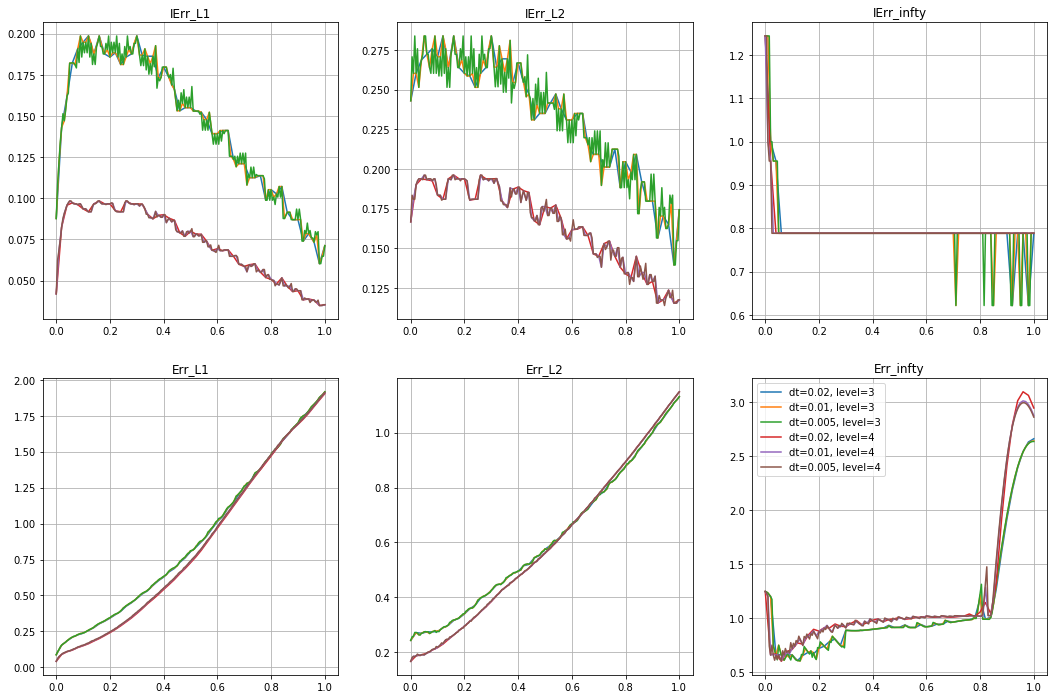

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = [ax for ax_row in axes for ax in ax_row]
errs = ["IErr_L1", "IErr_L2", "IErr_infty", "Err_L1", "Err_L2", "Err_infty"]

for index1, level in enumerate(levels):
    for index2, dt in enumerate(dts):
        run = index1 * len(dts) + index2
        for ax, err in zip(axes, errs):            
            ax.plot([d["t"] for d in mpp.data[run]["AcousticPDESolver"]["iteration_0"]],
                    [d[err] for d in mpp.data[run]["AcousticPDESolver"]["iteration_0"]],
                    label="dt={}, level={}".format(dt, level))

for ax, err in zip(axes, errs):    
    ax.set_title(err)
    ax.grid()

plt.legend()
plt.show()

In [4]:
import numpy as np
import json

err_l2_lst = []
err_l1_lst = []
h_lst = []
for index, level in enumerate(levels):
    for index2, dt in enumerate(dts):
        if dt != 0.005:
            continue
        err_l2_lst.append(mpp.data[index * len(dts) + index2]["AcousticPDESolver"]["iteration_0"][-1]["Err_L2"])
        err_l1_lst.append(mpp.data[index * len(dts) + index2]["AcousticPDESolver"]["iteration_0"][-1]["Err_L1"])
        h_lst.append(json.loads(mpp.data[index * len(dts) + index2]["AcousticPDESolver"]["Mesh Info"]["Mesh width [min, max]"])[1])

def err_on_order(h_max_lst, err_lst, order): 
    sqrt_h_lst = np.array(h_lst)**(order)
    return err_lst / sqrt_h_lst
    print("Err / h_max^(" + str(order)[:4] + "):", err_lst / sqrt_h_lst)
    
print("L2Err:", err_l2_lst)
print("L1Err:", err_l1_lst)
print("h_max:", h_lst)
print("\n")
print("L2Err / h^({}) =".format(0.5), err_on_order(h_lst, err_l2_lst, 0.5))
print("L2Err / h^({}) =".format(0.4), err_on_order(h_lst, err_l2_lst, 0.4))
print("L2Err / h^({}) =".format(0.33), err_on_order(h_lst, err_l2_lst, 0.33))
print("L1Err / h^({}) =".format(0.8), err_on_order(h_lst, err_l1_lst, 0.8))
print("L1Err / h^({}) =".format(0.7), err_on_order(h_lst, err_l1_lst, 0.7))
print("L1Err / h^({}) =".format(0.66), err_on_order(h_lst, err_l1_lst, 0.66))

L2Err: [1.1317834994558256, 1.1492905558967705]
L1Err: [1.9172767508152964, 1.911897630207286]
h_max: [0.125, 0.0625]


L2Err / h^(0.5) = [3.20116715 4.59716222]
L2Err / h^(0.4) = [2.60015569 3.48399747]
L2Err / h^(0.33) = [2.2479314  2.86938902]
L1Err / h^(0.8) = [10.11944736 17.5695493 ]
L1Err / h^(0.7) = [ 8.21954537 13.31522847]
L1Err / h^(0.66) = [ 7.56352414 11.91746331]


In [5]:
import os
sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))

['Params.RiemannWave2D',
 'Params.RiemannWave2D.pvtu',
 'RiemannWave2D.0',
 'RiemannWave2D.0.pvtu',
 'RiemannWave2D.1',
 'RiemannWave2D.1.pvtu',
 'RiemannWave2D.10',
 'RiemannWave2D.10.pvtu',
 'RiemannWave2D.100',
 'RiemannWave2D.100.pvtu',
 'RiemannWave2D.101',
 'RiemannWave2D.101.pvtu',
 'RiemannWave2D.102',
 'RiemannWave2D.102.pvtu',
 'RiemannWave2D.103',
 'RiemannWave2D.103.pvtu',
 'RiemannWave2D.104',
 'RiemannWave2D.104.pvtu',
 'RiemannWave2D.105',
 'RiemannWave2D.105.pvtu',
 'RiemannWave2D.106',
 'RiemannWave2D.106.pvtu',
 'RiemannWave2D.107',
 'RiemannWave2D.107.pvtu',
 'RiemannWave2D.108',
 'RiemannWave2D.108.pvtu',
 'RiemannWave2D.109',
 'RiemannWave2D.109.pvtu',
 'RiemannWave2D.11',
 'RiemannWave2D.11.pvtu',
 'RiemannWave2D.110',
 'RiemannWave2D.110.pvtu',
 'RiemannWave2D.111',
 'RiemannWave2D.111.pvtu',
 'RiemannWave2D.112',
 'RiemannWave2D.112.pvtu',
 'RiemannWave2D.113',
 'RiemannWave2D.113.pvtu',
 'RiemannWave2D.114',
 'RiemannWave2D.114.pvtu',
 'RiemannWave2D.115',
 'Ri

vtu module was not found


AttributeError: 'NoneType' object has no attribute 'SetFileName'

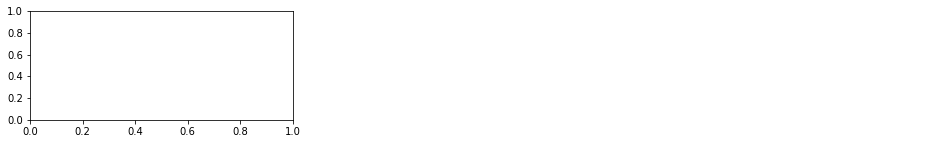

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

p = mpp.vtu_plot(figsize=(16, 2))
plt.axis('off')

gs = gridspec.GridSpec(1, 3)
p.ax1 = p.fig.add_subplot(gs[0])
p.add_vtu("RiemannWave2D.0.pvtu", vmin = -0.5, vmax = 0.5, ax=p.ax1)

p.ax2 = p.fig.add_subplot(gs[1])
p.add_vtu("RiemannWave2D.100.pvtu", vmin = -0.5, vmax = 0.5, ax=p.ax2)

p.ax3 = p.fig.add_subplot(gs[2])
p.add_vtu("RiemannWave2D.200.pvtu", vmin = -0.5, vmax = 0.5, ax=p.ax3)

### Problem Simple 

In [ ]:
mpp.clean_data()
mpp.reset_data()
kwargs = {}
mpp.run(4, config="TUT_acoustic", kwargs=kwargs)

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=160, step=1, value=0))
def plot_nth_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("GaussHatAndRicker2D.{}.pvtu".format(n), vmin = -0.001, vmax = 0.001)

### CRC Problem 

In [ ]:
kwargs = {
    "level": 0,
    "dt": 0.04,
    "plot_tStep": 1
}

mpp.clean_data()
mpp.reset_data()
mpp.run(4, config="TUT_sfb", kwargs=kwargs)

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

p = mpp.vtu_plot(figsize=(16, 16))
plt.axis('off')

gs = gridspec.GridSpec(9, 1)

for subplot in range(0, 9):
    p.ax = p.fig.add_subplot(gs[subplot])
    p.add_vtu("CRC.{}.pvtu".format(subplot * 25), vmin = -0.5, vmax = 0.5, ax=p.ax)